In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from sklearn.model_selection import cross_val_score
import math
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikeras.wrappers import KerasRegressor

In [ ]:
hybrid_data_alphabet = "/content/drive/MyDrive/Master thesis data/Window_Alphabet.csv"
financial_data_alphabet = "/content/drive/MyDrive/Master thesis data/alphabet_financial_window.csv"

hybrid_data_apple = "/content/drive/MyDrive/Master thesis data/Window_Apple.csv"
financial_data_apple = "/content/drive/MyDrive/Master thesis data/apple_financial_window.csv"

hybrid_data_microsoft = "/content/drive/MyDrive/Master thesis data/Window_Microsoft.csv"
financial_data_microsoft = "/content/drive/MyDrive/Master thesis data/microsoft_financial_window.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hybrid_data_alphabet = pd.read_csv(hybrid_data_alphabet)
financial_data_alphabet = pd.read_csv(financial_data_alphabet)

hybrid_data_apple = pd.read_csv(hybrid_data_apple)
financial_data_apple = pd.read_csv(financial_data_apple)

hybrid_data_microsoft = pd.read_csv(hybrid_data_microsoft)
financial_data_microsoft = pd.read_csv(financial_data_microsoft)

In [ ]:
hybrid_data_alphabet_X = hybrid_data_alphabet.drop(['date','close','Unnamed: 0' ], axis=1)
hybrid_data_alphabet_y = hybrid_data_alphabet['close']
financial_data_alphabet_X = financial_data_alphabet.drop(['date','close','Unnamed: 0'], axis=1)
financial_data_alphabet_y = financial_data_alphabet['close']

hybrid_data_apple_X = hybrid_data_apple.drop(['date','close','Unnamed: 0'], axis=1)
hybrid_data_apple_y = hybrid_data_apple['close']
financial_data_apple_X = financial_data_apple.drop(['date','close','Unnamed: 0'], axis=1)
financial_data_apple_y = financial_data_apple['close']

hybrid_data_microsoft_X = hybrid_data_microsoft.drop(['date','close','Unnamed: 0'], axis=1)
hybrid_data_microsoft_y = hybrid_data_microsoft['close']
financial_data_microsoft_X = financial_data_microsoft.drop(['date','close','Unnamed: 0'], axis=1)
financial_data_microsoft_y = financial_data_microsoft['close']

In [ ]:
financial_data_alphabet_X = financial_data_alphabet_X.tail(-4)
financial_data_alphabet_y = financial_data_alphabet_y.tail(-4)
financial_data_apple_X = financial_data_apple_X.tail(-4)
financial_data_apple_y = financial_data_apple_y.tail(-4)
financial_data_microsoft_X = financial_data_microsoft_X.tail(-4)
financial_data_microsoft_y = financial_data_microsoft_y.tail(-4)

In [ ]:
financial_data_alphabet_X = financial_data_alphabet_X.fillna(financial_data_alphabet_X.mean())
financial_data_apple_X = financial_data_apple_X.fillna(financial_data_apple_X.mean())
financial_data_microsoft_X = financial_data_microsoft_X.fillna(financial_data_microsoft_X.mean())

In [ ]:
hybrid_data_alphabet = hybrid_data_alphabet.drop(['close','Unnamed: 0' ], axis=1)
financial_data_alphabet = financial_data_alphabet.drop(['close','Unnamed: 0' ], axis=1)

hybrid_data_apple = hybrid_data_apple.drop(['close','Unnamed: 0'], axis=1)
financial_data_apple = financial_data_apple.drop([ 'close','Unnamed: 0' ], axis=1)

hybrid_data_microsoft = hybrid_data_microsoft.drop(['close','Unnamed: 0'], axis=1)
financial_data_microsoft = financial_data_microsoft.drop([ 'close','Unnamed: 0' ], axis=1)

In [ ]:
scaler_X_hybrid_alphabet = MinMaxScaler()
hybrid_data_alphabet_X = scaler_X_hybrid_alphabet.fit_transform(hybrid_data_alphabet_X)
scaler_Y_hybrid_alphabet = MinMaxScaler()
hybrid_data_alphabet_y = scaler_Y_hybrid_alphabet.fit_transform(hybrid_data_alphabet_y.values.reshape(-1, 1))
scaler_X_financial_alphabet = MinMaxScaler()
financial_data_alphabet_X = scaler_X_financial_alphabet.fit_transform(financial_data_alphabet_X)
scaler_Y_financial_alphabet = MinMaxScaler()
financial_data_alphabet_y = scaler_Y_financial_alphabet.fit_transform(financial_data_alphabet_y.values.reshape(-1, 1))

scaler_X_hybrid_microsoft = MinMaxScaler()
hybrid_data_microsoft_X = scaler_X_hybrid_microsoft.fit_transform(hybrid_data_microsoft_X)
scaler_Y_hybrid_microsoft = MinMaxScaler()
hybrid_data_microsoft_y = scaler_Y_hybrid_microsoft.fit_transform(hybrid_data_microsoft_y.values.reshape(-1, 1))
scaler_X_financial_microsoft = MinMaxScaler()
financial_data_microsoft_X = scaler_X_financial_microsoft.fit_transform(financial_data_microsoft_X)
scaler_Y_financial_microsoft = MinMaxScaler()
financial_data_microsoft_y = scaler_Y_financial_microsoft.fit_transform(financial_data_microsoft_y.values.reshape(-1, 1))

scaler_X_hybrid_apple = MinMaxScaler()
hybrid_data_apple_X = scaler_X_hybrid_apple.fit_transform(hybrid_data_apple_X)
scaler_Y_hybrid_apple = MinMaxScaler()
hybrid_data_apple_y = scaler_Y_hybrid_apple.fit_transform(hybrid_data_apple_y.values.reshape(-1, 1))
scaler_X_financial_apple = MinMaxScaler()
financial_data_apple_X = scaler_X_financial_apple.fit_transform(financial_data_apple_X)
scaler_Y_financial_apple = MinMaxScaler()
financial_data_apple_y = scaler_Y_financial_apple.fit_transform(financial_data_apple_y.values.reshape(-1, 1))

In [ ]:
financial_data_alphabet_X_reshaped= financial_data_alphabet_X.reshape(financial_data_alphabet_X.shape[0], 1, financial_data_alphabet_X.shape[1])
hybrid_data_alphabet_X_reshaped = hybrid_data_alphabet_X.reshape(hybrid_data_alphabet_X.shape[0], 1, hybrid_data_alphabet_X.shape[1])

financial_data_apple_X_reshaped = financial_data_apple_X.reshape(financial_data_apple_X.shape[0], 1, financial_data_apple_X.shape[1])
hybrid_data_apple_X_reshaped = hybrid_data_apple_X.reshape(hybrid_data_apple_X.shape[0], 1, hybrid_data_apple_X.shape[1])

financial_data_microsoft_X_reshaped = financial_data_microsoft_X.reshape(financial_data_microsoft_X.shape[0], 1, financial_data_microsoft_X.shape[1])
hybrid_data_microsoft_X_reshaped = hybrid_data_microsoft_X.reshape(hybrid_data_microsoft_X.shape[0], 1, hybrid_data_microsoft_X.shape[1])

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

financial_cv_alphabet = tscv.split(financial_data_alphabet_X_reshaped)
hybrid_cv_alphabet = tscv.split(hybrid_data_alphabet_X_reshaped)

financial_cv_apple = tscv.split(financial_data_apple_X_reshaped)
hybrid_cv_apple = tscv.split(hybrid_data_apple_X_reshaped)

financial_cv_microsoft = tscv.split(financial_data_microsoft_X_reshaped)
hybrid_cv_microsoft = tscv.split(hybrid_data_microsoft_X_reshaped)

In [ ]:
optimizer = RMSprop(lr=0.001)

parameters = {
    # 'hidden_units': [1, 10, 50],
    # 'epochs': [50, 100, 200],
    # 'batch_size': [8, 32, 64]
}


def create_model_financial(hidden_units=1, activation='linear', optimizer='RMSProp'):
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=False, input_shape=(financial_data_alphabet_X_reshaped.shape[1], financial_data_alphabet_X_reshaped.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer="adam", loss='mean_squared_error')
    return model

def create_model_hybrid(hidden_units=1, activation='linear', optimizer='RMSProp'):
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=False, input_shape=(hybrid_data_apple_X_reshaped.shape[1], hybrid_data_apple_X_reshaped.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer="adam", loss='mean_squared_error')
    return model



# create the KerasRegressor
financial_regressor = KerasRegressor(model=create_model_financial, epochs = 20, batch_size = 4, hidden_units=1)
hybrid_regressor = KerasRegressor(model=create_model_hybrid, epochs = 20, batch_size = 4, hidden_units=1)


grid_search_financial_alphabet = GridSearchCV(financial_regressor, parameters, cv=financial_cv_alphabet, scoring="neg_mean_squared_error", verbose=3)
grid_search_hybrid_alphabet = GridSearchCV(hybrid_regressor, parameters, cv=hybrid_cv_alphabet, scoring="neg_mean_squared_error",  verbose=3)

grid_search_financial_apple = GridSearchCV(financial_regressor, parameters, cv=financial_cv_apple, scoring="neg_mean_squared_error",  verbose=3)
grid_search_hybrid_apple = GridSearchCV(hybrid_regressor, parameters, cv=hybrid_cv_apple, scoring="neg_mean_squared_error", verbose=3)

grid_search_financial_microsoft = GridSearchCV(financial_regressor, parameters, cv=financial_cv_microsoft, scoring="neg_mean_squared_error",  verbose=3)
grid_search_hybrid_microsoft = GridSearchCV(hybrid_regressor, parameters, cv=hybrid_cv_microsoft, scoring="neg_mean_squared_error", verbose=3)

grid_search_financial_alphabet.fit(financial_data_alphabet_X_reshaped, financial_data_alphabet_y)
grid_search_hybrid_alphabet.fit(hybrid_data_alphabet_X_reshaped, hybrid_data_alphabet_y)

grid_search_financial_apple.fit(financial_data_apple_X_reshaped, financial_data_apple_y)
grid_search_hybrid_apple.fit(hybrid_data_apple_X_reshaped, hybrid_data_apple_y)

grid_search_financial_microsoft.fit(financial_data_microsoft_X_reshaped, financial_data_microsoft_y)
grid_search_hybrid_microsoft.fit(hybrid_data_microsoft_X_reshaped, hybrid_data_microsoft_y)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Epoch 1/20
43/43 [==============================] - 6s 7ms/step - loss: 9.3341e-04
Epoch 2/20
43/43 [==============================] - 0s 7ms/step - loss: 4.5404e-04
Epoch 3/20
43/43 [==============================] - 0s 6ms/step - loss: 3.2921e-04
Epoch 4/20
43/43 [==============================] - 0s 7ms/step - loss: 3.1486e-04
Epoch 5/20
43/43 [==============================] - 0s 9ms/step - loss: 2.0180e-04
Epoch 6/20
43/43 [==============================] - 0s 6ms/step - loss: 2.2534e-04
Epoch 7/20
43/43 [==============================] - 0s 7ms/step - loss: 2.4406e-04
Epoch 8/20
43/43 [==============================] - 0s 6ms/step - loss: 2.3716e-04
Epoch 9/20
43/43 [==============================] - 0s 6ms/step - loss: 2.0975e-04
Epoch 10/20
43/43 [==============================] - 0s 7ms/step - loss: 1.6058e-04
Epoch 11/20
43/43 [==============================] - 0s 6ms/step - loss: 1.7481e-04
Epoch 12/20
43/43 [=======

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7ffa124199e0>,
             estimator=KerasRegressor(batch_size=4, epochs=20, hidden_units=1, model=<function create_model_hybrid at 0x7ffa123ba550>),
             param_grid={}, scoring='neg_mean_squared_error', verbose=3)

In [ ]:
grid_search_financial_alphabet.best_params_

{}

In [ ]:
grid_search_hybrid_alphabet.best_params_

{}

In [ ]:
grid_search_financial_apple.best_params_

{}

In [ ]:
grid_search_hybrid_apple.best_params_

{}

In [ ]:
grid_search_financial_microsoft.best_params_

{}

In [ ]:
grid_search_hybrid_microsoft.best_params_

{}

In [ ]:
alphabet_financial_params = grid_search_financial_alphabet.best_params_

alphabet_hybrid_params = grid_search_hybrid_alphabet.best_params_

apple_financial_params = grid_search_financial_apple.best_params_

apple_hybrid_params = grid_search_hybrid_apple.best_params_

microsoft_financial_params = grid_search_financial_microsoft.best_params_

microsoft_hybrid_params = grid_search_hybrid_microsoft.best_params_

In [ ]:
apple_financial_reg = KerasRegressor(model=create_model_financial, **apple_financial_params)
apple_hybrid_reg = KerasRegressor(model=create_model_hybrid, **apple_hybrid_params)

microsoft_financial_reg = KerasRegressor(model=create_model_financial, **microsoft_financial_params)
microsoft_hybrid_reg = KerasRegressor(model=create_model_hybrid, **microsoft_hybrid_params)

alphabet_financial_reg = KerasRegressor(model=create_model_financial, **alphabet_financial_params)
alphabet_hybrid_reg = KerasRegressor(model=create_model_hybrid, **alphabet_hybrid_params)

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

financial_cv_alphabet = tscv.split(financial_data_alphabet_X_reshaped)
hybrid_cv_alphabet = tscv.split(hybrid_data_alphabet_X_reshaped)

financial_cv_apple = tscv.split(financial_data_apple_X_reshaped)
hybrid_cv_apple = tscv.split(hybrid_data_apple_X_reshaped)

financial_cv_microsoft = tscv.split(financial_data_microsoft_X_reshaped)
hybrid_cv_microsoft = tscv.split(hybrid_data_microsoft_X_reshaped)

In [ ]:
cross_val_alphabet_financial = cross_val_score(alphabet_financial_reg, financial_data_alphabet_X_reshaped, financial_data_alphabet_y, cv=financial_cv_alphabet, scoring='neg_mean_squared_error')
cross_val_alphabet_hybrid = cross_val_score(alphabet_hybrid_reg, hybrid_data_alphabet_X_reshaped, hybrid_data_alphabet_y, cv=hybrid_cv_alphabet, scoring='neg_mean_squared_error')

cross_val_apple_financial = cross_val_score(apple_financial_reg, financial_data_apple_X_reshaped, financial_data_apple_y, cv=financial_cv_apple, scoring='neg_mean_squared_error')
cross_val_apple_hybrid = cross_val_score(apple_hybrid_reg, hybrid_data_apple_X_reshaped, hybrid_data_apple_y, cv=hybrid_cv_apple, scoring='neg_mean_squared_error')

cross_val_microsoft_financial = cross_val_score(microsoft_financial_reg, financial_data_microsoft_X_reshaped, financial_data_microsoft_y, cv=financial_cv_microsoft, scoring='neg_mean_squared_error')
cross_val_microsoft_hybrid = cross_val_score(microsoft_hybrid_reg, hybrid_data_microsoft_X_reshaped, hybrid_data_microsoft_y, cv=hybrid_cv_microsoft, scoring='neg_mean_squared_error')

6/6 [==============================] - 0s 3ms/step


In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

financial_cv_alphabet = tscv.split(financial_data_alphabet_X_reshaped)
hybrid_cv_alphabet = tscv.split(hybrid_data_alphabet_X_reshaped)

financial_cv_apple = tscv.split(financial_data_apple_X_reshaped)
hybrid_cv_apple = tscv.split(hybrid_data_apple_X_reshaped)

financial_cv_microsoft = tscv.split(financial_data_microsoft_X_reshaped)
hybrid_cv_microsoft = tscv.split(hybrid_data_microsoft_X_reshaped)

In [ ]:
apple_financial_reg = KerasRegressor(model=create_model_financial, **apple_financial_params)
apple_hybrid_reg = KerasRegressor(model=create_model_hybrid, **apple_hybrid_params)

microsoft_financial_reg = KerasRegressor(model=create_model_financial, **microsoft_financial_params)
microsoft_hybrid_reg = KerasRegressor(model=create_model_hybrid, **microsoft_hybrid_params)

alphabet_financial_reg = KerasRegressor(model=create_model_financial, **alphabet_financial_params)
alphabet_hybrid_reg = KerasRegressor(model=create_model_hybrid, **alphabet_hybrid_params)

In [ ]:
cross_val_alphabet_financial_mape = cross_val_score(alphabet_financial_reg, financial_data_alphabet_X_reshaped, financial_data_alphabet_y, cv=financial_cv_alphabet, scoring='neg_mean_absolute_percentage_error')
cross_val_alphabet_hybrid_mape = cross_val_score(alphabet_hybrid_reg, hybrid_data_alphabet_X_reshaped, hybrid_data_alphabet_y, cv=hybrid_cv_alphabet, scoring='neg_mean_absolute_percentage_error')

cross_val_apple_financial_mape = cross_val_score(apple_financial_reg, financial_data_apple_X_reshaped, financial_data_apple_y, cv=financial_cv_apple, scoring='neg_mean_absolute_percentage_error')
cross_val_apple_hybrid_mape = cross_val_score(apple_hybrid_reg, hybrid_data_apple_X_reshaped, hybrid_data_apple_y, cv=hybrid_cv_apple, scoring='neg_mean_absolute_percentage_error')

cross_val_microsoft_financial_mape = cross_val_score(microsoft_financial_reg, financial_data_microsoft_X_reshaped, financial_data_microsoft_y, cv=financial_cv_microsoft, scoring='neg_mean_absolute_percentage_error')
cross_val_microsoft_hybrid_mape = cross_val_score(microsoft_hybrid_reg, hybrid_data_microsoft_X_reshaped, hybrid_data_microsoft_y, cv=hybrid_cv_microsoft, scoring='neg_mean_absolute_percentage_error')

6/6 [==============================] - 0s 3ms/step


In [ ]:
cross_val_alphabet_financial = cross_val_alphabet_financial.mean() * -1
cross_val_alphabet_hybrid = cross_val_alphabet_hybrid.mean() * -1
cross_val_apple_financial = cross_val_apple_financial.mean() * -1
cross_val_apple_hybrid = cross_val_apple_hybrid.mean() * -1
cross_val_microsoft_financial = cross_val_microsoft_financial.mean() * -1
cross_val_microsoft_hybrid = cross_val_microsoft_hybrid.mean() * -1

In [ ]:
cross_val_alphabet_financial_mape = cross_val_alphabet_financial_mape.mean() * -1
cross_val_alphabet_hybrid_mape = cross_val_alphabet_hybrid_mape.mean() * -1
cross_val_apple_financial_mape = cross_val_apple_financial_mape.mean() * -1
cross_val_apple_hybrid_mape = cross_val_apple_hybrid_mape.mean() * -1
cross_val_microsoft_financial_mape = cross_val_microsoft_financial_mape.mean() * -1
cross_val_microsoft_hybrid_mape = cross_val_microsoft_hybrid_mape.mean() * -1

In [ ]:
cross_val_alphabet_financial = scaler_Y_financial_alphabet.inverse_transform(cross_val_alphabet_financial.reshape(1, -1))
cross_val_alphabet_hybrid = scaler_Y_hybrid_alphabet.inverse_transform(cross_val_alphabet_hybrid.reshape(1, -1))

cross_val_apple_financial = scaler_Y_financial_apple.inverse_transform(cross_val_apple_financial.reshape(1, -1))
cross_val_apple_hybrid = scaler_Y_hybrid_apple.inverse_transform(cross_val_apple_hybrid.reshape(1, -1))

cross_val_microsoft_financial = scaler_Y_financial_microsoft.inverse_transform(cross_val_microsoft_financial.reshape(1, -1))
cross_val_microsoft_hybrid = scaler_Y_hybrid_microsoft.inverse_transform(cross_val_microsoft_hybrid.reshape(1, -1))

In [ ]:
def assign_direction_prediction(val):
  open = val['open']
  close = val['prediction']
  if (open < close):
    val['direction_prediction'] = 1
  if (close == open):
    val['direction_prediction'] = 0
  if (open > close):
    val['direction_prediction'] = 2
  return val

def assign_actual_direction(val):
  open = val['open']
  close = val['actual']
  if (open < close):
    val['direction_actual'] = 1
  if (close == open):
    val['direction_actual'] = 0
  if (open > close):
    val['direction_actual'] = 2
  return val


def plot_price_prediction(x, y, model, title, scaler_y, scaler_x, open_column, ax, true_x):
    train_X_1 = x[0:200]
    train_X_2 = x[0:400]
    train_X_3 = x[0:600]
    train_X_4 = x[0:800]
    test_X_1 = x[200:400]
    test_X_2 = x[400:600]
    test_X_3 = x[600:800]
    test_X_4 = x[800:]

    train_y_1 = y[0:200]
    train_y_2 = y[0:400]
    train_y_3 = y[0:600]
    train_y_4 = y[0:800]
    test_y_1 = y[200:400]
    test_y_2 = y[400:600]
    test_y_3 = y[600:800]
    test_y_4 = y[800:]

    model.fit(train_X_1, train_y_1)
    predict_1 = model.predict(test_X_1)
    model.fit(train_X_2, train_y_2)
    predict_2 = model.predict(test_X_2)
    model.fit(train_X_3, train_y_3)
    predict_3 = model.predict(test_X_3)
    model.fit(train_X_4, train_y_4)
    predict_4 = model.predict(test_X_4)

    final_predictions = [predict_1, predict_2, predict_3, predict_4]
    final_actuals = [test_y_1, test_y_2, test_y_3, test_y_4]

    predictions = np.concatenate(final_predictions).ravel()
    true = np.concatenate(final_actuals).ravel()
    predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1))
    true = scaler_y.inverse_transform(true.reshape(-1, 1))
    date = pd.DataFrame(hybrid_data_microsoft['date'][200:]).reset_index(drop=True)

    de_scaled_data = pd.DataFrame(scaler_x.inverse_transform(true_x[200:]))
    dataFrame = {'actual': true.ravel(),
            'prediction': predictions.ravel(),
            'open': de_scaled_data[open_column].shift(-1)}
    dataFrame = pd.DataFrame(dataFrame)
    dataFrame = pd.concat([dataFrame, date], axis=1)
    dataFrame = dataFrame.dropna()
    dataFrame = dataFrame.set_index('date')


    dataFrame.plot(xlabel="Date", ylabel="Price", title=title, ax=ax)
    dataFrame = dataFrame.apply(assign_direction_prediction, axis=1)
    dataFrame = dataFrame.apply(assign_actual_direction, axis=1)
    accuracy = accuracy_score(dataFrame['direction_actual'], dataFrame['direction_prediction'])
    return accuracy

In [ ]:
apple_financial_reg = KerasRegressor(model=create_model_financial, **apple_financial_params)
apple_hybrid_reg = KerasRegressor(model=create_model_hybrid, **apple_hybrid_params)

microsoft_financial_reg = KerasRegressor(model=create_model_financial, **microsoft_financial_params)
microsoft_hybrid_reg = KerasRegressor(model=create_model_hybrid, **microsoft_hybrid_params)

alphabet_financial_reg = KerasRegressor(model=create_model_financial, **alphabet_financial_params)
alphabet_hybrid_reg = KerasRegressor(model=create_model_hybrid, **alphabet_hybrid_params)

Utdata för streaming har trunkerats till de sista 5000 raderna.
 [132.16484 ]
 [132.24213 ]
 [132.45981 ]
 [133.04114 ]
 [132.27824 ]
 [131.42781 ]
 [130.06721 ]
 [129.8538  ]
 [130.16573 ]
 [129.6006  ]
 [130.84036 ]
 [130.95535 ]
 [131.24129 ]
 [132.60664 ]
 [133.77864 ]
 [134.359   ]
 [135.26424 ]
 [136.02814 ]
 [137.34119 ]
 [137.9868  ]
 [136.90831 ]
 [137.54825 ]
 [135.4527  ]
 [134.3939  ]
 [132.69977 ]
 [130.43356 ]
 [129.89577 ]
 [130.1275  ]
 [131.83832 ]
 [132.46663 ]
 [135.16353 ]
 [136.01773 ]
 [136.34288 ]
 [137.49626 ]
 [137.8167  ]
 [137.76941 ]
 [137.88083 ]
 [137.05083 ]
 [136.21648 ]
 [136.0149  ]
 [135.52448 ]
 [135.04648 ]
 [134.4873  ]
 [135.1861  ]
 [134.99176 ]
 [134.46146 ]
 [133.68848 ]
 [133.24387 ]
 [132.80347 ]
 [132.93977 ]
 [132.93887 ]
 [131.31998 ]
 [131.41046 ]
 [129.4193  ]
 [126.99831 ]
 [126.07847 ]
 [125.70131 ]
 [124.87974 ]
 [124.257164]
 [123.808334]]
7/7 [==============================] - 0s 4ms/step
        0      1      2      3      4      5

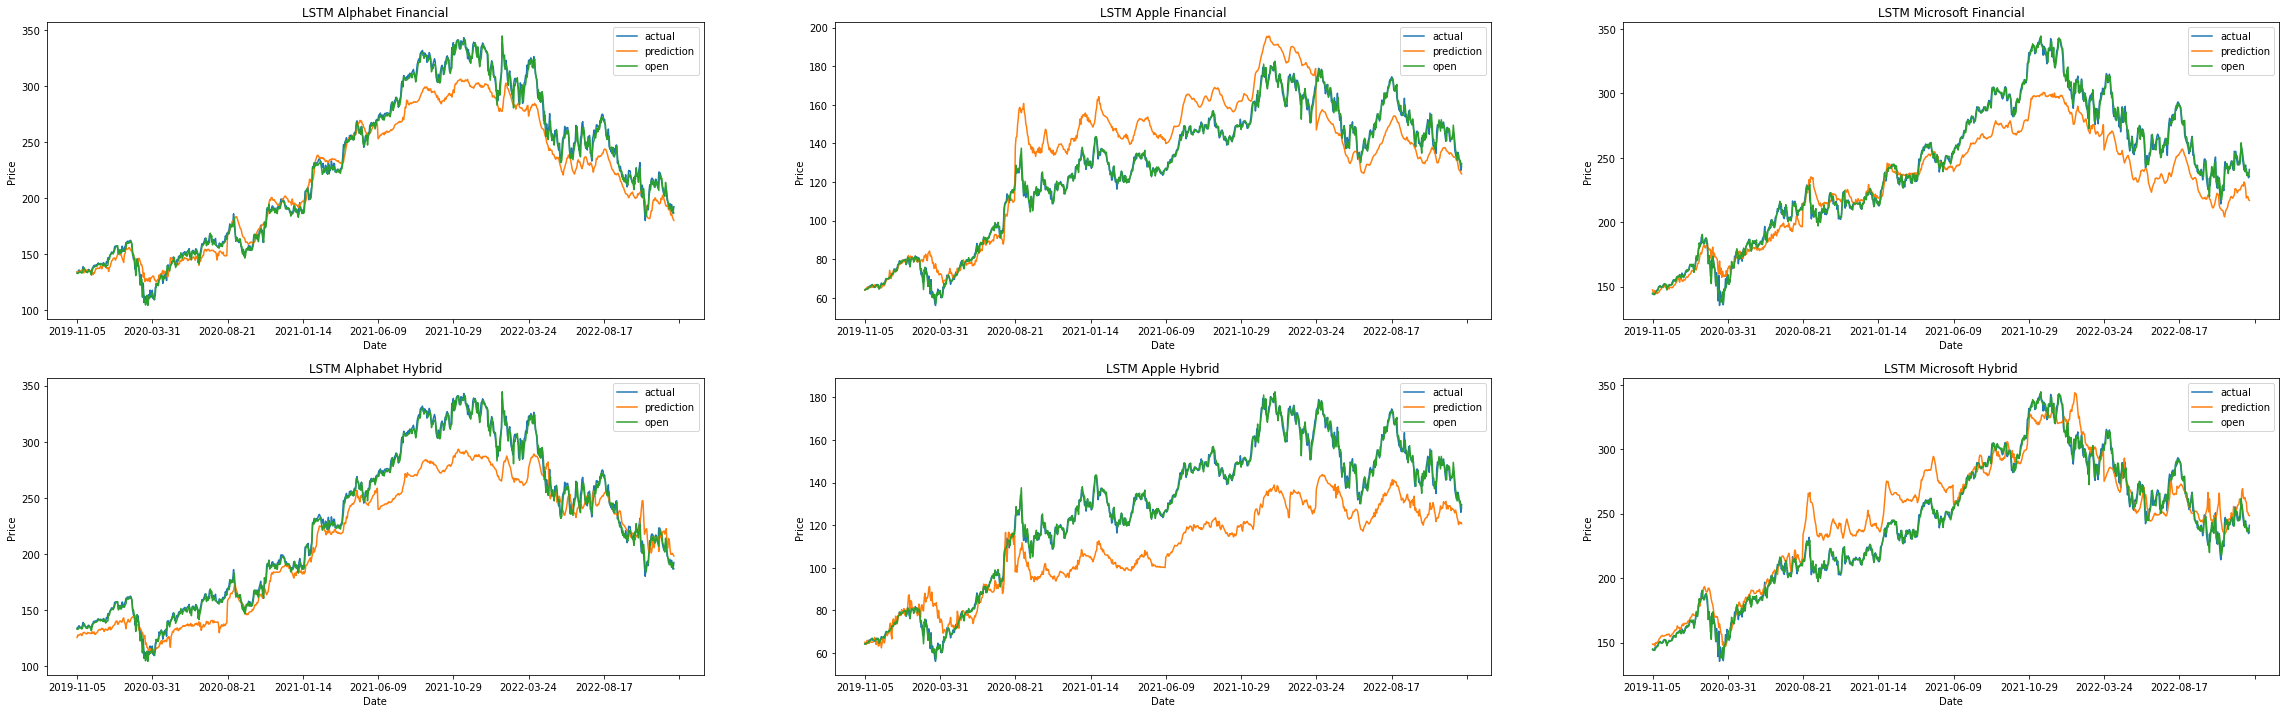

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(40, 12))
accuracy_microsoft_financial= plot_price_prediction(financial_data_microsoft_X_reshaped, financial_data_microsoft_y, microsoft_financial_reg, "LSTM Microsoft Financial", scaler_Y_financial_microsoft, scaler_X_financial_microsoft, 4,axs[0, 2], financial_data_microsoft_X)
accuracy_microsoft_hybrid= plot_price_prediction(hybrid_data_microsoft_X_reshaped, hybrid_data_microsoft_y, microsoft_hybrid_reg, "LSTM Microsoft Hybrid", scaler_Y_hybrid_microsoft, scaler_X_hybrid_microsoft, 19,axs[1, 2],hybrid_data_microsoft_X)
accuracy_apple_financial = plot_price_prediction(financial_data_apple_X_reshaped, financial_data_apple_y, apple_financial_reg, "LSTM Apple Financial", scaler_Y_financial_apple, scaler_X_financial_apple, 4,axs[0, 1],financial_data_apple_X)
accuracy_apple_hybrid = plot_price_prediction(hybrid_data_apple_X_reshaped, hybrid_data_apple_y, apple_hybrid_reg, "LSTM Apple Hybrid", scaler_Y_hybrid_apple,scaler_X_hybrid_apple, 19,axs[1, 1],hybrid_data_apple_X)
accuracy_alphabet_financial = plot_price_prediction(financial_data_alphabet_X_reshaped, financial_data_alphabet_y, alphabet_financial_reg, "LSTM Alphabet Financial", scaler_Y_financial_microsoft, scaler_X_financial_microsoft, 4,axs[0, 0],financial_data_alphabet_X)
accuracy_alphabet_hybrid = plot_price_prediction(hybrid_data_alphabet_X_reshaped, hybrid_data_alphabet_y, alphabet_hybrid_reg, "LSTM Alphabet Hybrid", scaler_Y_hybrid_microsoft, scaler_X_hybrid_microsoft, 19,axs[1, 0],hybrid_data_alphabet_X)

In [ ]:
results = pd.DataFrame(columns=['data','MSE','RMSE', "Direction Accuracy"])

results = results.append({'data':'Alphabet Financial',
                              'MSE':cross_val_alphabet_financial.ravel()[0],
                              'RMSE':math.sqrt(cross_val_alphabet_financial),
                              'MAPE':cross_val_alphabet_financial_mape.ravel()[0],
                              "Direction Accuracy": accuracy_alphabet_financial},ignore_index=True)
results = results.append({'data':'Alphabet Hybrid',
                              'MSE':cross_val_alphabet_hybrid.ravel()[0],
                              'RMSE':math.sqrt(cross_val_alphabet_hybrid),
                              'MAPE': cross_val_alphabet_hybrid_mape.ravel()[0],
                              "Direction Accuracy": accuracy_alphabet_hybrid},ignore_index=True)
results = results.append({'data':'Apple Financial',
                              'MSE':cross_val_apple_financial.ravel()[0],
                              'RMSE':math.sqrt(cross_val_apple_financial),
                              'MAPE':cross_val_apple_financial_mape.ravel()[0],
                          "Direction Accuracy": accuracy_apple_financial},ignore_index=True)
results = results.append({'data':'Apple Hybrid',
                              'MSE':cross_val_apple_hybrid.ravel()[0],
                              'RMSE':math.sqrt(cross_val_apple_hybrid),
                              'MAPE': cross_val_apple_hybrid_mape.ravel()[0],
                              "Direction Accuracy": accuracy_apple_hybrid},ignore_index=True)
results = results.append({'data':'Microsoft Financial',
                              'MSE':cross_val_microsoft_financial.ravel()[0],
                              'RMSE':math.sqrt(cross_val_microsoft_financial),
                              'MAPE':cross_val_microsoft_financial_mape.ravel()[0],
                          "Direction Accuracy": accuracy_microsoft_financial},ignore_index=True)
results = results.append({'data':'Microsoft Hybrid',
                              'MSE':cross_val_microsoft_hybrid.ravel()[0],
                              'RMSE':math.sqrt(cross_val_microsoft_hybrid),
                              'MAPE':cross_val_microsoft_hybrid_mape.ravel()[0],
                          "Direction Accuracy": accuracy_microsoft_hybrid},ignore_index=True)


<ipython-input-73-023f39c62864>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Alphabet Financial',
<ipython-input-73-023f39c62864>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Alphabet Hybrid',
<ipython-input-73-023f39c62864>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Apple Financial',
<ipython-input-73-023f39c62864>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Apple Hybrid',
<ipython-input-73-023f39c62864>:23: FutureWarning: The frame.append method is deprecated and will be removed f

In [ ]:
display(results)

,data,MSE,RMSE,Direction Accuracy,MAPE
0,Alphabet Financial,52.324844,7.233591,0.449622,0.170836
1,Alphabet Hybrid,52.321187,7.233339,0.366499,0.185674
2,Apple Financial,39.919337,6.318175,0.502519,0.107150
3,Apple Hybrid,39.783808,6.307441,0.493703,0.127226
4,Microsoft Financial,105.148589,10.254199,0.477330,0.115827
5,Microsoft Hybrid,104.889343,10.241550,0.525189,0.092034
